# **1. PROBLEMİN TANIMI**

**1.1 Senaryo Tanımı**

Bu çalışmada bir belediyenin kurmayı planladığı güneş enerjisi sistemi için, panellerin:

Eğim açısı (x1)

Güney yönüne göre sapma açısı (x2)

değerleri Genetik Algoritma kullanılarak optimize edilmiştir.


**1.2 Amaç Fonksiyonu ve Değişkenler**

Amaç fonksiyonu:

y=6x1​+4x2​−0.1(x1)​^2

x1: Panel eğim açısı -> [10, 45]

x2: Güney yönüne göre sapma -> [15, 90]

Amaç, toplam enerji verimini maksimize etmektir.

**1.3 Kısıtların Uygulanması**

Kısıtlar açık ve net şekilde tanımlanmıştır:

𝑥1+0.5𝑥2≤60

x2​≥15



# **2. GENETİK ALGORİTMA YAPISI**

### 2.1 Kütüphane Yüklemeleri

Bu hücrede, Genetik Algoritma'yı uygulamak için gerekli olan Python kütüphaneleri içe aktarılıyor:

*   numpy: Sayısal işlemler ve diziler için kullanılır.
*   random: Rastgele sayı üretimi için kullanılır.
*   matplotlib.pyplot: Algoritma sonuçlarını görselleştirmek için kullanılır.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

print("kütüphaneler kuruldu")

kütüphaneler kuruldu


### 2.2 Sabit Parametre Tanımlamaları

Bu bölümde, Genetik Algoritma'nın davranışını kontrol eden temel parametreler tanımlanmıştır:

*   populasyon_buyuk: Her nesildeki birey sayısını belirtir. Algoritma bu sayıda çözüm adayı üzerinde çalışır.
*   nesil_sayisi: Algoritmanın kaç döngü (nesil) boyunca çalışacağını belirler. Daha yüksek değerler genellikle daha iyi çözümlere yol açar ancak daha uzun sürer.
*   mut_orani: Mutasyonun gerçekleşme olasılığını belirler (örneğin %10). Bu oran, genetik çeşitliliği korumak ve yerel optimumlardan kaçınmak için önemlidir.
*   mutasyon_buyuk: Mutasyon gerçekleştiğinde bir genin ne kadar değişeceğini belirler. Derece cinsinden bir değişim büyüklüğünü temsil eder.

In [2]:
populasyon_buyuk = 50           # Popülasyon büyüklüğü
nesil_sayisi = 150         # Nesil sayısı
mut_orani = 0.1          # Mutasyon oranı
mutasyon_buyuk = 5.0          # Mutasyonun büyüklüğü
print("sabitler tanımlandı")

sabitler tanımlandı


### 2.3 Amaç Fonksiyonu

amac_fonksiyonu adlı bu Python fonksiyonu, Genetik Algoritma'nın optimize etmeye çalıştığı matematiksel ifadeyi temsil eder. Güneş paneli örneğinde, x1 (eğim açısı) ve x2 (güney yönüne sapma açısı) değerlerine bağlı olarak panelin enerji verimini (y) hesaplar. Algoritmanın hedefi, bu fonksiyonun çıktı değerini maksimize etmektir.

In [3]:
def amac_fonksiyonu(x1, x2):
    """
    Amaç Fonksiyonu: y = 6x1 + 4x2 - 0.1x1^2
    """
    return 6 * x1 + 4 * x2 - 0.1 * (x1 * x1)

### 2.4 Kısıt Kontrol Fonksiyonu

kısıt_kontrol fonksiyonu, belirli bir x1 ve x2 değer çiftinin, problem için tanımlanan tüm kısıtlamaları karşılayıp karşılamadığını denetler. Bu kısıtlamalar iki ana kategoriye ayrılır:

1.  **kisit1:** x1 için 10 ile 45 derece, x2 için ise 0 ile 90 derece arasındaki fiziksel aralıkları kontrol eder.
2.  **kisit2:** x1 + 0.5 * x2 <= 60 ve x2 >= 15 gibi problem özgü kısıtlamaları denetler.

Fonksiyon, tüm kısıtlamalar sağlandığında True, aksi takdirde False döndürür.

In [4]:
def kısıt_kontrol(x1, x2):
    """
    Kısıtlara uyup uymadığını kontrol eder.
    Kısıtlar: x1 + 0.5x2 ≤ 60 ve x2 ≥ 15
    """
    kisit1 = (10 <= x1 <= 45) and (0 <= x2 <= 90)
    kisit2 = (x1 + 0.5 * x2 <= 60) and (x2 >= 15)

    return kisit1 and kisit2

print("Kısıt kontrol fonksiyonu")

Kısıt kontrol fonksiyonu


### 2.5 Başlangıç Popülasyonu Oluşturma

pop_oluştur fonksiyonu, Genetik Algoritma'nın başlangıç noktasını, yani ilk birey kümesini oluşturur. Belirtilen boyut kadar birey üretir. Her bir birey (x1, x2 değerleri), kısıt_kontrol fonksiyonuna kadar rastgele bir şekilde oluşturulur. Bu, başlangıç popülasyonunun yalnızca geçerli kısıtlardan oluşmasını sağlar.

In [5]:

def pop_oluştur(size):
    """Kısıtları sağlayan başlangıç popülasyonunu oluşturur."""
    pop = []
    for _ in range(size):
        while True:
            x1 = random.uniform(10, 45)
            x2 = random.uniform(0, 90)
            if kısıt_kontrol(x1, x2):
                pop.append(np.array([x1, x2]))
                break
    return np.array(pop)

print("Popülasyon oluşturma fonksiyonu")

Popülasyon oluşturma fonksiyonu


### 2.6 Seçilim Fonksiyonu

Seçilim fonksiyonu, sonraki nesli oluşturmak için mevcut popülasyondan ebeveynleri seçmek üzere 'sıralama tabanlı seçim' (rank selection) yöntemini kullanır. Bu yöntem:

1.  Bireyleri fitness değerlerine göre sıralar.
2.  Daha yüksek fitness'a sahip bireylere, daha düşük fitness'a sahip bireylerden daha yüksek seçilme olasılığı verir.
3.  Ancak, en iyi bireylerin bile aşırı baskın olmasını engelleyerek popülasyonda çeşitliliği korumaya yardımcı olur.

Fonksiyon, populasyon_buyuk kadar ebeveyn adayı seçerek geri döndürür.

In [6]:
def seçilim(populasyon, fitnesslar):
    """
    Rank'a (sıraya) göre ebeveyn seçimi.

    """
    N = len(populasyon)
    # Fitness'a göre büyükten küçüğe sırala
    sirali_indeksler = np.argsort(-fitnesslar)

    # Sıralama tabanlı olasılıkları hesapla
    payda = N * (N + 1) / 2
    secim_ihtimalleri = np.array([(N - i) / payda for i in range(N)])

    # Olasılıkları orijinal popülasyon indekslerine eşle
    ihtimaller = np.zeros_like(secim_ihtimalleri)
    for i, idx in enumerate(sirali_indeksler):
        ihtimaller[idx] = secim_ihtimalleri[i]

    # POP_SIZE kadar bireyi seç
    secilen_indeksler = np.random.choice(N, size=len(populasyon), p=ihtimaller)
    return [populasyon[i] for i in secilen_indeksler]

print("Seçilim fonksiyonu")

Seçilim fonksiyonu


### 2.7 Çaprazlama Fonksiyonu

Çaprazlama fonksiyonu, seçilen iki ebeveyn bireyin genlerini (burada x` ve x2) 'tek noktalı çaprazlama' yöntemiyle birleştirerek iki yeni yavru birey oluşturur. Bu özel uygulamada:

*   Birinci çocuk, birinci ebeveynin x1 genini ve ikinci ebeveynin x2 genini alır.
*   İkinci çocuk, ikinci ebeveynin x1 genini ve birinci ebeveynin x2 genini alır.

Bu işlem, genetik materyalin sonraki nesillere aktarımını ve yeni çözüm kombinasyonlarının keşfedilmesini sağlar.

In [7]:

def çaprazlama(p1, p2):
    """
    Genleri tek Noktalı Çaprazlama ile karıştırır.
    """
    #  x1 (p1'den) ve x2 (p2'den) alır.
    cocuk1 = np.array([p1[0], p2[1]])
    cocuk2 = np.array([p2[0], p1[1]])
    return cocuk1, cocuk2

print("Çaprazlama fonksiyonu")

Çaprazlama fonksiyonu


### 2.8 Mutasyon Fonksiyonu

Mutasyon fonksiyonu, yeni oluşturulan bireylerin genlerinde rastgele küçük değişiklikler yaparak genetik çeşitliliği artırır ve algoritmanın yeni çözüm alanlarını keşfetmesine yardımcı olur. Fonksiyonun işleyişi şöyledir:

1.  Bireyin her bir geni (x1 ve x2) için mut_orani olasılıkla mutasyon uygulanıp uygulanmayacağına karar verir.
2.  Eğer mutasyon uygulanacaksa, mutasyon_buyuk değeri kullanılarak gene rastgele bir değişim ekler.
3.  Mutasyon sonrasında gen değerlerinin tanımlı sınırlar (örneğin x1 için 10-45 arası, x2 için 0-90 arası) içinde kalmasını sağlar. Sınır dışına çıkan değerleri en yakın sınıra çeker.

In [8]:
def mutasyon(birey):
    """
    Bireyin genlerine rastgele değişim uygular ve sınırları kontrol eder.
    """
    yeni = birey.copy()

    for i in range(len(yeni)):
        if random.random() < mut_orani:
            # Rastgele değişim ekle
            degisim = mutasyon_buyuk * (random.random() - 0.5)
            yeni[i] += degisim

            # Sınır Kontrolü (Geri Çekme)
            if i == 0: # x1 için
                yeni[i] = max(10, min(45, yeni[i]))
            else: # x2 için
                yeni[i] = max(0, min(90, yeni[i]))

    return np.round(yeni, 2)

print("Mutasyon fonksiyonu")

Mutasyon fonksiyonu


### 2.9 Ana Genetik Algoritma Döngüsü ve Sonuç Analizi

Bu hücredeki GA_calistir fonksiyonu, Genetik Algoritma'nın tüm ana adımlarını (Hesaplama, Seçim, Üretim, Güncelleme) yöneten merkezi döngüyü içerir. Ayrıca en iyi çözümü izler ve sonuçları görselleştirir.

**Fonksiyonun Adımları:**

1.  **Başlangıç Popülasyonu Oluşturma:** pop_oluştur fonksiyonunu kullanarak ilk birey kümesini hazırlar.
2.  **Nesil Döngüsü:** Belirlenen nesil_sayisi kadar döngü yapar.
    *   **Fitness Hesaplama:** Her birey için amac_fonksiyonu ve kısıt_kontrol kullanarak bir fitness değeri hesaplar. Kısıtları sağlamayan bireylere çok düşük bir fitness atayarak cezalandırır.
    *   **Elitizm:** Her nesildeki en iyi bireyi (en_iyi_birey) ve onun fitness değerini (max_fitness) takip eder ve bir sonraki nesle doğrudan aktarır (elitizm).
    *   **Seçilim:** seçilim fonksiyonunu kullanarak ebeveyn havuzunu oluşturur.
    *   **Çaprazlama ve Mutasyon:** Ebeveyn çiftlerini çaprazlar (çaprazlama) ve yavrulara mutasyon uygular (mutasyon).
    *   **Popülasyon Güncelleme:** Eski popülasyonu, elit birey ve yeni yavrularla günceller.
    *   **İlerleme Takibi:** Belirli nesillerde (nesil % 25 == 0) mevcut en yüksek verimi yazdırır.
3.  **Grafik Çizimi:** Tüm nesiller boyunca en yüksek fitness değerinin nasıl değiştiğini gösteren bir çizgi grafiği (matplotlib) oluşturur. Bu grafik, algoritmanın yakınsama davranışını gösterir.
4.  **Optimum Sonuç:** Algoritma tamamlandığında, bulunan en iyi bireyin (x1, x2) değerlerini ve elde edilen maksimum enerji verimini yazdırır.

**ÇALIŞTIRMA KOMUTU:** En alttaki kısım, GA_Calistir() fonksiyonunu çağırarak tüm Genetik Algoritma sürecini başlatır ve nihai optimum çözümü ekrana yazdırır.

--- Genetik Algoritma Başlatılıyor ---
Nesil 25/150: En Yüksek Verim = 418.2223
Nesil 50/150: En Yüksek Verim = 421.0590
Nesil 75/150: En Yüksek Verim = 421.0590
Nesil 100/150: En Yüksek Verim = 427.1386
Nesil 125/150: En Yüksek Verim = 427.1990
Nesil 150/150: En Yüksek Verim = 427.3497


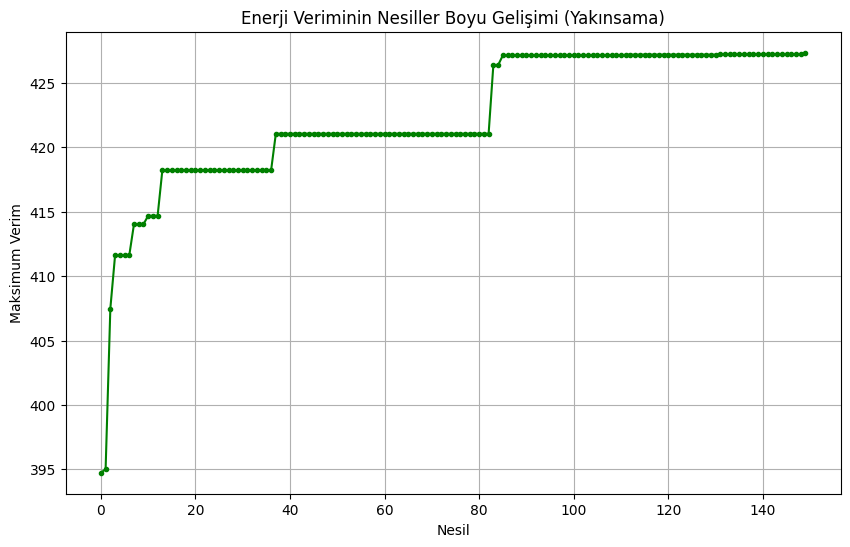

SONUÇ
Genetik Algoritma ile en iyi çözüm bulundu:
✅ Eğim Açısı (x1): {en_iyi_cozum[0]} derece
✅ Güney Sapması (x2): {en_iyi_cozum[1]} derece
✅ Maksimum Enerji Verimi (y): {en_yuksek_uygunluk}


In [9]:
# Colab Hücre 7: Ana Döngü ve Sonuç Analizi

def Ga_calistir():
    """Tüm GA adımlarını (Hesaplama, Seçim, Üretim, Güncelleme) yönetir."""
    populasyon = pop_oluştur(populasyon_buyuk)
    en_iyi_fitness_tarihcesi = []
    en_iyi_birey = None
    max_fitness = -float('inf')

    print("--- Genetik Algoritma Başlatılıyor ---")

    for nesil in range(nesil_sayisi):

        # 1. Fitness Hesapla (Kısıt cezası dahil)
        fitnesslar = np.array([amac_fonksiyonu(b[0], b[1]) if kısıt_kontrol(b[0], b[1]) else -9999.0 for b in populasyon])

        # Elitizm: En iyi bireyi bul ve sakla
        current_best_index = np.argmax(fitnesslar)
        current_max_fitness = fitnesslar[current_best_index]

        if current_max_fitness > max_fitness:
            max_fitness = current_max_fitness
            en_iyi_birey = populasyon[current_best_index].copy()

        en_iyi_fitness_tarihcesi.append(max_fitness)

        # 2. Seçilim ve Yeni Nesil Üretimi
        ebeveynler = seçilim(populasyon, fitnesslar)
        random.shuffle(ebeveynler)

        yeni_pop = [en_iyi_birey] # Elitizm: En iyiyi koru

        for i in range(0, len(ebeveynler) - 1, 2):
            p1, p2 = ebeveynler[i], ebeveynler[i+1]
            c1, c2 = çaprazlama(p1, p2)
            c1 = mutasyon(c1)
            c2 = mutasyon(c2)
            yeni_pop.extend([c1, c2])

        # 3. Popülasyonu Güncelle
        populasyon = np.array(yeni_pop[:populasyon_buyuk])

        if (nesil + 1) % 25 == 0 or nesil == nesil_sayisi - 1:
            print(f"Nesil {nesil+1}/{nesil_sayisi}: En Yüksek Verim = {max_fitness:.4f}")

    # Grafik Çizimi
    plt.figure(figsize=(10, 6))
    plt.plot(en_iyi_fitness_tarihcesi, color='green', marker='.')
    plt.title("Enerji Veriminin Nesiller Boyu Gelişimi (Yakınsama)")
    plt.xlabel("Nesil")
    plt.ylabel("Maksimum Verim")
    plt.grid(True)
    plt.show()

    return en_iyi_birey, max_fitness

# --- ÇALIŞTIRMA KOMUTU ---
en_iyi_cozum, en_yuksek_uygunluk = Ga_calistir()

print("SONUÇ")
print("Genetik Algoritma ile en iyi çözüm bulundu:")
print("✅ Eğim Açısı (x1): {en_iyi_cozum[0]} derece")
print("✅ Güney Sapması (x2): {en_iyi_cozum[1]} derece")
print("✅ Maksimum Enerji Verimi (y): {en_yuksek_uygunluk}")